# Structured Names
This notebook describes how to use structured names to check SBML models for moiety balance.

In [1]:
import init
from SBMLLint.common import constants as cn
from SBMLLint.common.molecule import Molecule
from SBMLLint.common import simple_sbml
from SBMLLint.common.reaction import Reaction
from SBMLLint.tools import sbmllint
from SBMLLint.tools import print_reactions

import os
import pandas as pd
import matplotlib.pyplot as plt
import tellurium as te

In [2]:
from SBMLLint.common.simple_sbml import modelIterator

In [3]:
iterator = modelIterator(initial=19, final=25)
for item in iterator:
    print(item.filename)

BIOMD0000000241_url.xml
BIOMD0000000350_url.xml
MODEL0847712949_url.xml
BIOMD0000000346_url.xml
BIOMD0000000256_url.xml
BIOMD0000000402_url.xml


In [4]:
import init
from SBMLLint.tools import sbmllint

# The first step in glycolysis, expressed
# in the Antimony language.
model = """
Glu + A__P_3 -> Glu_P + A_P_P; 1
Glu = 0
A_P_P_P = 0
Glu_P = 0
A_P_P = 0
"""
_ = sbmllint.lint(model)


0 of 1 reactions have imbalances.



In [5]:
# The first step in glycolysis, with an error (wrongly goes to A instead of A_P_P)
model = """
Glu + A_P_P_P -> Glu_P + A_P; 1
"""
_ = sbmllint.lint(model)


1 of 1 reactions have imbalances.

***_J0: Glu + A_P_P_P -> Glu_P + A_P
Excess moieties in reactants
  P: 1.00




## Sturctured Names in BioModels

In [6]:
path = os.path.join(cn.ANALYSIS_STRUCTURED_NAMES_DIR, "analyze_structured_names.xlsx")
df = pd.read_excel(path)
FILENAME = "filename"
IS_STRUCTURED = "Structured?"
NUM_BOUNDARY_REACTIONS = "Boundary Reactions"
NUM_REACTIONS = "Total Reactions"
NUM_IMBALANCED_REACTIONS = "Imbalanced Reactions"
NUM_BALANCED_REACTIONS = "Balanced Reactions"
FRAC_BALANCED_REACTIONS = "Fraction Balanced"
FRAC_BOUNDARY_REACTIONS = "Fraction Boundary"
df.head()

,filename,Structured?,Boundary Reactions,Total Reactions,Imbalanced Reactions,Balanced Reactions,Fraction Balanced,Fraction Boundary
0,BIOMD0000000099_url.xml,False,14,14,12,2,inf,1.0
1,BIOMD0000000359_url.xml,True,0,8,1,7,0.875000,0.0
2,BIOMD0000000360_url.xml,True,0,8,1,7,0.875000,0.0
3,BIOMD0000000361_url.xml,True,0,5,1,4,0.800000,0.0
4,BIOMD0000000647_url.xml,True,0,11,3,8,0.727273,0.0


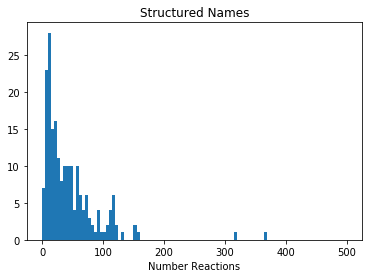

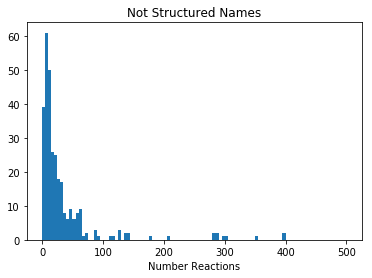

In [7]:
def plotIsStructured(val):
    df1 = df[df[IS_STRUCTURED] == val]
    plt.hist(df1[NUM_REACTIONS], bins=100, range=(0, 500))
    if val:
        title = "Structured Names"
    else:
        title = "Not Structured Names"
    plt.title(title)
    plt.xlabel("Number Reactions")
    plt.show()
plotIsStructured(True)
plotIsStructured(False)

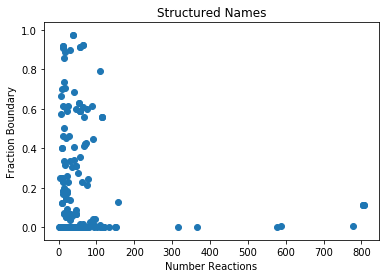

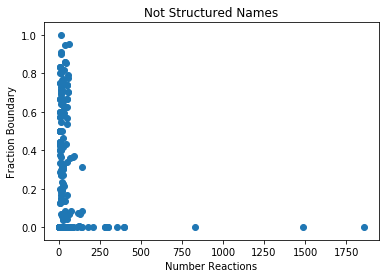

In [8]:
def plotFrcBoundary(val):
    df1 = df[df[IS_STRUCTURED] == val]
    plt.scatter(df1[NUM_REACTIONS], df1[FRAC_BOUNDARY_REACTIONS])
    if val:
        title = "Structured Names"
    else:
        title = "Not Structured Names"
    plt.title(title)
    plt.xlabel("Number Reactions")
    plt.ylabel("Fraction Boundary")
    plt.show()
plotFrcBoundary(True)
plotFrcBoundary(False)

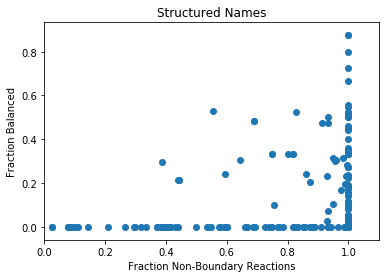

In [13]:
def plotFrcBalanced():
    df1 = df[df[IS_STRUCTURED]]
    xv = (1.0*df1[NUM_REACTIONS] - df1[NUM_BOUNDARY_REACTIONS]) / df1[NUM_REACTIONS]
    plt.scatter(xv, df1[FRAC_BALANCED_REACTIONS])
    title = "Structured Names"
    plt.title(title)
    plt.xlabel("Fraction Non-Boundary Reactions")
    plt.ylabel("Fraction Balanced")
    plt.xlim([0, 1.1])
    plt.show()
plotFrcBalanced()